# Importando bibliotecas necessárias para o projeto.


In [1]:
!pip install ipywidgets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_recall_curve, auc, classification_report

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


# Carregando o conjunto de dados e o exibindo.

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exibindo estatísticas descritivas do conjunto de dados.


In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exibindo informações sobre o conjunto de dados, como o tipo dos dados e os valores.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Verificando a soma dos valores nulos em cada coluna.


In [5]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# Verificando a soma de valores duplicados no conjunto de dados.


In [6]:
data.duplicated().sum()

0

# Removendo colunas irrelevantes do conjunto de dados e exibindo para verificar.


In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Codificando as colunas categóricas "Gender" e "Geography" usando LabelEncoder.



In [8]:
encod = LabelEncoder()
data["Gender"] = encod.fit_transform(data["Gender"])
data["Geography"] = encod.fit_transform(data["Geography"])

# Exibindo o conjunto de dados após a codificação.


In [9]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Calculando a correlação entre as colunas e a coluna "Exited".


In [10]:
data.corr()['Exited']

,Exited
CreditScore,-0.027094
Geography,0.035943
Gender,-0.106512
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097


# Exibindo informações sobre o conjunto de dados após a codificação.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# Separando as características (x) e a variável alvo (y).


In [12]:
x = data.drop(['Exited'], axis = 1)
y = data['Exited']
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [13]:
# Aplicando a técnica NearMiss para lidar com o desequilíbrio de classes.

from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_resampled, y_resampled = nm.fit_resample(x, y)

# Dividindo os dados em conjuntos de treinamento e teste.

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3259, 10)
(815, 10)
(3259,)
(815,)


# Normalizando os dados usando MinMaxScaler.


In [14]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.fit_transform(x_test)

In [15]:
# Criando um modelo de rede neural sequencial.

modelo = Sequential()
# Adicionando uma camada densa com 100 neurônios, função de ativação ReLU e regularização L2.

modelo.add(Dense(100, input_dim = 10, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
modelo.add(Dropout(0.3)) # Adicionando uma camada de dropout com taxa de 30%
modelo.add(Dense(100,  activation = 'relu')) # Adicionando uma camada densa com 100 neurônios e função de ativação ReLU.
modelo.add(Dropout(0.3))
modelo.add(Dense(100, activation = 'relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(100,  activation = 'relu'))
modelo.add(Dropout(0.3))
modelo.add(Dense(1, activation = 'sigmoid')) # Adicionando uma camada densa como "saida" com 1 neurônio e função de ativação sigmoid.

# Configurando o modelo para treinamento (função de perda, otimizador e métricas)
modelo.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])

# Definindo parada antecipada para evitar overfitting.
EarlyStopping = EarlyStopping(monitor = 'val_loss', patience = 20)

# Treinando o modelo com os dados de treino e validação usando a parada antecipada.
modelo.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 100, callbacks = EarlyStopping)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - binary_accuracy: 0.5853 - loss: 0.8380 - val_binary_accuracy: 0.8196 - val_loss: 0.6474
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.7695 - loss: 0.6251 - val_binary_accuracy: 0.8920 - val_loss: 0.3869
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.8567 - loss: 0.4370 - val_binary_accuracy: 0.8969 - val_loss: 0.3686
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.8839 - loss: 0.3906 - val_binary_accuracy: 0.8957 - val_loss: 0.3551
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8831 - loss: 0.3840 - val_binary_accuracy: 0.8908 - val_loss: 0.3442
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8940 - loss: 0.3491 - val_binary_accuracy: 0.8920 - val_loss: 0.3369
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8862 - loss: 0.3550 - val_binary_accuracy: 0.8883 - val_loss: 0.3363
Epoch 8/

# Exibindo um resumo do modelo, incluindo o número de parâmetros em cada camada.


In [16]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,505 (369.16 KB)

 Trainable params: 31,501 (123.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,004 (246.11 KB)

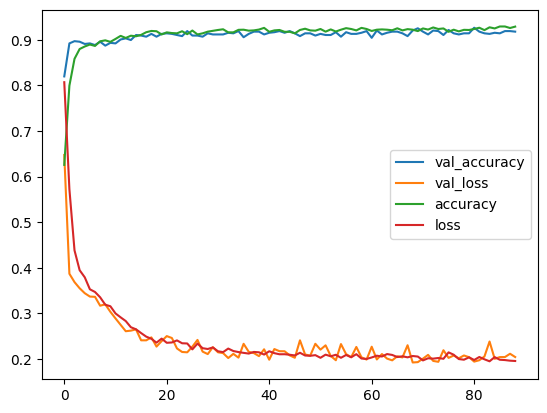

In [17]:
modelo.history.history.keys() # Obtendo as chaves do histórico de treinamento (acurácia e perda para treino e validação)

plt.plot(modelo.history.history['val_binary_accuracy']) # Plotando a acurácia de validação

plt.plot(modelo.history.history['val_loss']) # Plotando a perda de validação

plt.plot(modelo.history.history['binary_accuracy']) # Plotando a acurácia de treinamento

plt.plot(modelo.history.history['loss']) # Plotando a perda de treinamento

# Adicionando uma legenda ao gráfico e o exibindo.
plt.legend(['val_accuracy', 'val_loss', 'accuracy', 'loss'])
plt.show()

In [18]:
previsao = modelo.predict(x_test) # Fazendo previsões no conjunto de teste.

previsao = (previsao > 0.4).astype(int) # Convertendo as previsões em valores binários com base em um limite de 0.4

# Calculando e imprimindo as previsões e a acurácia das previsões em relação aos valores reais.
print(previsao)
print(accuracy_score(y_test, previsao))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 

# Calculando a matriz de confusão, criando um mapa de calor com rótulos definidos e o exibindo.


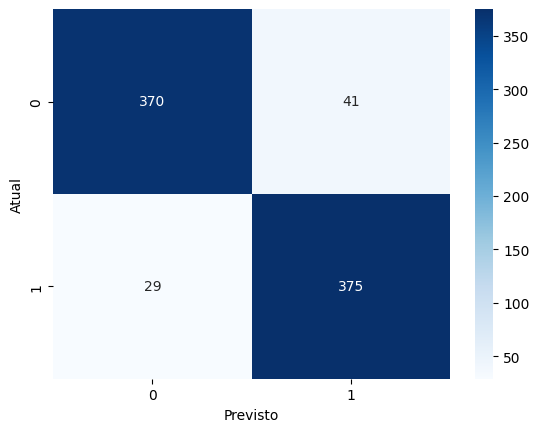

In [19]:
cm = confusion_matrix(y_test, previsao)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.show()

# Calculando o relatório de classificação e o mostrando.


In [20]:
classification = classification_report(y_test, previsao)
print(classification)


              precision    recall  f1-score   support

           0       0.93      0.90      0.91       411
           1       0.90      0.93      0.91       404

    accuracy                           0.91       815
   macro avg       0.91      0.91      0.91       815
weighted avg       0.91      0.91      0.91       815



In [22]:
# Dicionário das características disponíveis
caracteristicas = {'Idade': 'Age', 'Saldo': 'Balance', 'Pontuação de Crédito': 'CreditScore'}  # Adicione mais características aqui

# Função para atualizar o gráfico
def atualizar_grafico(caracteristica):
  plt.hist(data[caracteristicas[caracteristica]][data['Exited'] == 0], label='Não Saiu', alpha=0.8)
  plt.hist(data[caracteristicas[caracteristica]][data['Exited'] == 1], label='Saiu', alpha=0.8)
  plt.xlabel(caracteristica)
  plt.ylabel('Frequência')
  plt.title(f'Distribuição de {caracteristica} entre Clientes que Saíram e Não Saíram')
  plt.legend()
  plt.show()

# Criando o dropdown para selecionar a característica
dropdown = widgets.Dropdown(options=list(caracteristicas.keys()), description='Característica:')

# Interage o dropdown com a função de atualização do gráfico
widgets.interactive(atualizar_grafico, caracteristica=dropdown)

interactive(children=(Dropdown(description='Característica:', options=('Idade', 'Saldo', 'Pontuação de Crédito…

In [23]:
# Dicionário das características disponíveis
caracteristicas = {'Idade': 'Age', 'Saldo': 'Balance', 'Pontuação de Crédito': 'CreditScore'}

# Função para atualizar o gráfico
def atualizar_grafico(caracteristica):
  # Definindo as faixas para cada característica
  if caracteristica == 'Idade':
    faixas = [0, 30, 40, 50, 60, 100]
    rotulos = ['<30', '30-40', '40-50', '50-60', '>60']
  elif caracteristica == 'Saldo':
    faixas = [0, 50000, 100000, 150000, 200000, float('inf')]
    rotulos = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
  elif caracteristica == 'Pontuação de Crédito':
    faixas = [0, 600, 650, 700, 750, 850]
    rotulos = ['<600', '600-650', '650-700', '700-750', '>750']

  # Criando uma nova coluna com as faixas
  data['Faixa'] = pd.cut(data[caracteristicas[caracteristica]], bins=faixas, labels=rotulos, right=False)

  # Filtrando os dados para clientes que saíram (Exited == 1)
  clientes_sairam = data[data['Exited'] == 1]

  # Calculando a contagem de clientes em cada faixa para os clientes que saíram
  contagem_faixa = clientes_sairam.groupby(['Faixa'])['Faixa'].count()

  # Cria o gráfico de pizza
  plt.pie(contagem_faixa, labels=contagem_faixa.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribuição de Faixas de {caracteristica} para Clientes que Saíram')
  plt.show()

# Cria o dropdown para selecionar a característica
dropdown = widgets.Dropdown(options=list(caracteristicas.keys()), description='Característica:')

# Interage o dropdown com a função de atualização do gráfico
widgets.interactive(atualizar_grafico, caracteristica=dropdown)

interactive(children=(Dropdown(description='Característica:', options=('Idade', 'Saldo', 'Pontuação de Crédito…